<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Aranzazú Rendón Gómez, Héctor Daniel Chavez Orozco.
    
**Fecha:** 28 de abril del 2021.

**Expediente:** 722272, 713442.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 9: Clase 22
    
Liga del repositorio: https://github.com/Aranzazu-R/Tarea9y10_HectorChavez_AranzazuRendon.git

# <font color = 'red'> Enunciado Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y compararlo con el valor teórico de la ecuación de Black & Scholes.

## RESPUESTA HECTOR

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry')

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-06-18,18.75,call,AAPL210618C00018750,...,2021-04-22 23:59:58,2021-04-21 19:44:37,"{'contractSymbol': 'AAPL210618C00018750', 'str..."
2021-06-18,18.75,put,AAPL210618P00018750,...,2021-04-22 23:59:58,2021-04-22 14:35:20,"{'contractSymbol': 'AAPL210618P00018750', 'str..."
2021-06-18,20.00,call,AAPL210618C00020000,...,2021-04-22 23:59:58,2021-04-14 15:36:52,"{'contractSymbol': 'AAPL210618C00020000', 'str..."
2021-06-18,20.00,put,AAPL210618P00020000,...,2021-04-22 23:59:58,2021-03-22 19:57:37,"{'contractSymbol': 'AAPL210618P00020000', 'str..."
2021-06-18,21.25,call,AAPL210618C00021250,...,2021-04-22 23:59:58,2021-02-04 18:50:12,"{'contractSymbol': 'AAPL210618C00021250', 'str..."
...,...,...,...,...,...,...,...
2021-09-17,1000.00,call,AAPL210917C01000000,...,2021-04-22 23:59:58,2020-08-28 19:58:31,"{'contractSymbol': 'AAPL210917C01000000', 'str..."
2022-01-21,1000.00,call,AAPL220121C01000000,...,2021-04-22 23:59:58,2020-08-28 19:59:43,"{'contractSymbol': 'AAPL220121C01000000', 'str..."
2022-06-17,1000.00,call,AAPL220617C01000000,...,2021-04-22 23:59:58,2020-08-28 19:48:09,"{'contractSymbol': 'AAPL220617C01000000', 'str..."


Precio del activo subyacente

In [3]:
aapl_opt.Underlying_Price[0]

131.88

Datos de la opción 

In [4]:
aapl_opt.loc[0]
aapl_opt.loc[0, 'JSON']

{'contractSymbol': 'AAPL210618C00018750',
 'strike': 18.75,
 'currency': 'USD',
 'lastPrice': 114.88,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 1,
 'openInterest': 26,
 'bid': 113.0,
 'ask': 113.55,
 'contractSize': 'REGULAR',
 'expiration': 1623974400,
 'lastTradeDate': 1619034277,
 'impliedVolatility': 2.00781748046875,
 'inTheMoney': True}

Una vez tenemos la información, podemos consultar de qué tipo son las opciones

In [5]:
aapl_opt.loc[:, 'Type']

0       call
1        put
2       call
3        put
4       call
        ... 
2245    call
2246    call
2247    call
2248    call
2249     put
Name: Type, Length: 2250, dtype: object

In [6]:
pd.set_option('display.max_rows', 10)
aapl_opt.loc[:, 'Expiry']

0      2021-06-18
1      2021-06-18
2      2021-06-18
3      2021-06-18
4      2021-06-18
          ...    
2245   2021-09-17
2246   2022-01-21
2247   2022-06-17
2248   2022-09-16
2249   2022-09-16
Name: Expiry, Length: 2250, dtype: datetime64[ns]

In [7]:
fecha1 = '2021-06-18'
fecha2 = '2022-09-16'
put06_f1 = aapl_opt.loc[(aapl_opt.Expiry== fecha1) & (aapl_opt.Type=='put')]
put06_f2 = aapl_opt.loc[(aapl_opt.Expiry== fecha2) & (aapl_opt.Type=='put')]
put06_f1


,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
1,18.75,2021-06-18,put,...,2021-04-22 23:59:58,2021-04-22 14:35:20,"{'contractSymbol': 'AAPL210618P00018750', 'str..."
3,20.00,2021-06-18,put,...,2021-04-22 23:59:58,2021-03-22 19:57:37,"{'contractSymbol': 'AAPL210618P00020000', 'str..."
5,21.25,2021-06-18,put,...,2021-04-22 23:59:58,2021-04-22 18:11:42,"{'contractSymbol': 'AAPL210618P00021250', 'str..."
7,22.50,2021-06-18,put,...,2021-04-22 23:59:58,2021-03-02 20:14:35,"{'contractSymbol': 'AAPL210618P00022500', 'str..."
10,23.75,2021-06-18,put,...,2021-04-22 23:59:58,2021-03-02 18:56:38,"{'contractSymbol': 'AAPL210618P00023750', 'str..."
...,...,...,...,...,...,...,...
2185,640.00,2021-06-18,put,...,2021-04-22 23:59:58,2020-08-25 16:08:58,"{'contractSymbol': 'AAPL210618P00640000', 'str..."
2195,660.00,2021-06-18,put,...,2021-04-22 23:59:58,2020-08-27 16:29:02,"{'contractSymbol': 'AAPL210618P00660000', 'str..."
2203,680.00,2021-06-18,put,...,2021-04-22 23:59:58,2020-08-25 14:59:07,"{'contractSymbol': 'AAPL210618P00680000', 'str..."
2211,700.00,2021-06-18,put,...,2021-04-22 23:59:58,2020-08-27 19:58:45,"{'contractSymbol': 'AAPL210618P00700000', 'str..."


> ### Validar para la `fecha = 2021-06-18` y para la fecha `fecha = '2022-09-16'`

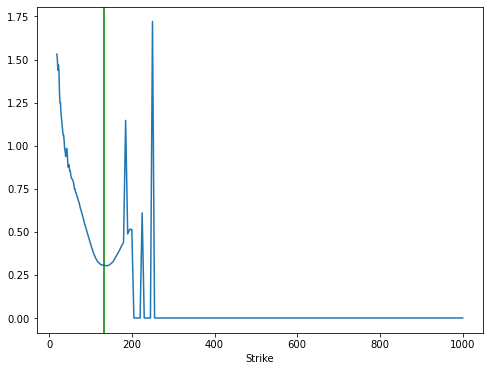

In [8]:
# para los put de la fecha 1
ax = put06_f1.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06_f1.Underlying_Price.iloc[0], color='g');

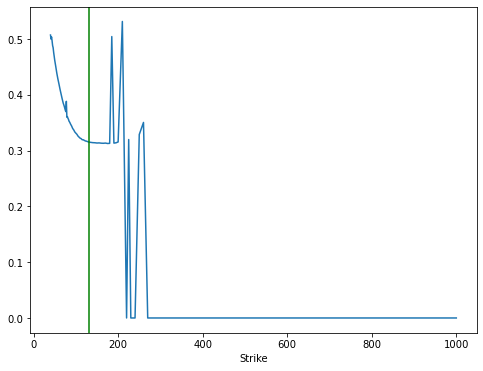

In [9]:
# para los put de la fecha 2
ax = put06_f2.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06_f2.Underlying_Price.iloc[0], color='g');

Analicemos ahora datos de los `call`

In [10]:
call06_f1 = aapl_opt.loc[(aapl_opt.Expiry==fecha1) & (aapl_opt.Type=='call')]
call06_f1

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
0,18.75,2021-06-18,call,...,2021-04-22 23:59:58,2021-04-21 19:44:37,"{'contractSymbol': 'AAPL210618C00018750', 'str..."
2,20.00,2021-06-18,call,...,2021-04-22 23:59:58,2021-04-14 15:36:52,"{'contractSymbol': 'AAPL210618C00020000', 'str..."
4,21.25,2021-06-18,call,...,2021-04-22 23:59:58,2021-02-04 18:50:12,"{'contractSymbol': 'AAPL210618C00021250', 'str..."
6,22.50,2021-06-18,call,...,2021-04-22 23:59:58,2021-02-04 18:50:12,"{'contractSymbol': 'AAPL210618C00022500', 'str..."
13,25.00,2021-06-18,call,...,2021-04-22 23:59:58,2021-04-16 15:20:28,"{'contractSymbol': 'AAPL210618C00025000', 'str..."
...,...,...,...,...,...,...,...
2220,720.00,2021-06-18,call,...,2021-04-22 23:59:58,2020-08-28 19:40:17,"{'contractSymbol': 'AAPL210618C00720000', 'str..."
2227,740.00,2021-06-18,call,...,2021-04-22 23:59:58,2020-08-28 19:01:26,"{'contractSymbol': 'AAPL210618C00740000', 'str..."
2233,800.00,2021-06-18,call,...,2021-04-22 23:59:58,2020-08-28 17:55:20,"{'contractSymbol': 'AAPL210618C00800000', 'str..."
2238,900.00,2021-06-18,call,...,2021-04-22 23:59:58,2020-08-28 16:08:44,"{'contractSymbol': 'AAPL210618C00900000', 'str..."


Para los `call` de la `fecha 1`

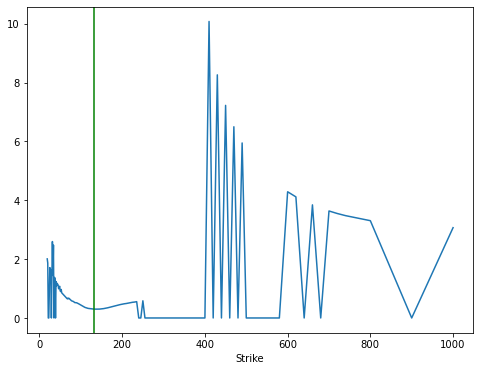

In [11]:
ax = call06_f1.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(call06_f1.Underlying_Price.iloc[0], color='g')

Con lo que hemos aprendido, deberíamos ser capaces de crear una función que nos devuelva un `DataFrame` de `pandas` con los precios de cierre ajustados de ciertas compañías en ciertas fechas:
- Escribir la función a continuación

In [12]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

- Obtener como ejemplo los precios de cierre de Apple del año pasado hasta la fecha. Graficar...

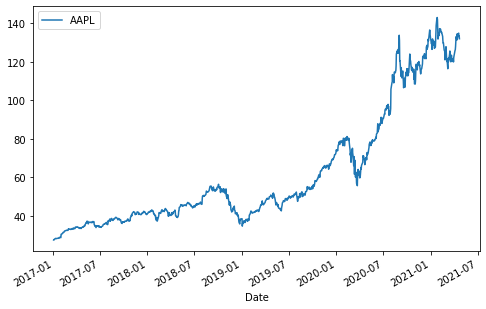

In [13]:
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

- Escribir una función que pasándole el histórico de precios devuelva los rendimientos logarítmicos:

In [14]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

- Graficar...

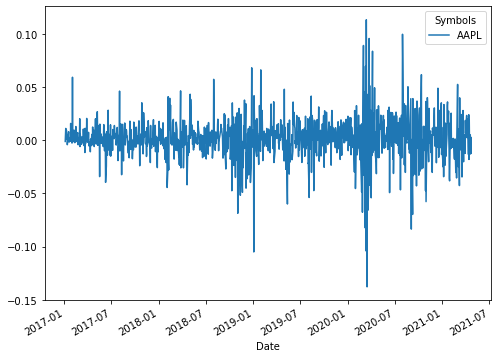

In [15]:
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

También, descargar datos de opciones de Apple:

In [16]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-04-23,118.0,call,AAPL210423C00118000,...,2021-04-22 23:59:58,2021-04-22 14:22:54,"{'contractSymbol': 'AAPL210423C00118000', 'str..."
2021-04-23,135.0,put,AAPL210423P00135000,...,2021-04-22 23:59:58,2021-04-22 19:59:35,"{'contractSymbol': 'AAPL210423P00135000', 'str..."
2021-04-23,135.0,call,AAPL210423C00135000,...,2021-04-22 23:59:58,2021-04-22 19:59:51,"{'contractSymbol': 'AAPL210423C00135000', 'str..."
2021-04-23,90.0,call,AAPL210423C00090000,...,2021-04-22 23:59:58,2021-04-21 18:15:29,"{'contractSymbol': 'AAPL210423C00090000', 'str..."
2021-04-23,155.0,call,AAPL210423C00155000,...,2021-04-22 23:59:58,2021-04-22 14:46:55,"{'contractSymbol': 'AAPL210423C00155000', 'str..."
...,...,...,...,...,...,...,...
2023-06-16,175.0,put,AAPL230616P00175000,...,2021-04-22 23:59:58,2021-04-14 18:28:43,"{'contractSymbol': 'AAPL230616P00175000', 'str..."
2023-06-16,80.0,put,AAPL230616P00080000,...,2021-04-22 23:59:58,2021-04-19 18:53:28,"{'contractSymbol': 'AAPL230616P00080000', 'str..."
2023-06-16,80.0,call,AAPL230616C00080000,...,2021-04-22 23:59:58,2021-04-22 17:49:22,"{'contractSymbol': 'AAPL230616C00080000', 'str..."


In [17]:
aapl_opt.Underlying_Price[0]

131.88

In [18]:
K = 130 # strike price
indice_opt = aapl_opt.loc[(aapl_opt.Type=='put') & (aapl_opt.Strike==K) & (aapl_opt.Expiry=='2023-06-16')]
indice_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
1142,130.0,2023-06-16,put,...,2021-04-22 23:59:58,2021-04-22 18:28:19,"{'contractSymbol': 'AAPL230616P00130000', 'str..."


In [19]:
i_opt= indice_opt.index
opcion_valuar = aapl_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'AAPL230616P00130000',
 'strike': 130.0,
 'currency': 'USD',
 'lastPrice': 22.8,
 'change': 0.29999924,
 'percentChange': 1.3333299,
 'volume': 4,
 'openInterest': 134,
 'bid': 22.65,
 'ask': 23.2,
 'contractSize': 'REGULAR',
 'expiration': 1686873600,
 'lastTradeDate': 1619116099,
 'impliedVolatility': 0.31836619140624994,
 'inTheMoney': False}

In [20]:
print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  131.88


# Simulación de precios usando rendimiento simple y logarítmico 

* Comenzaremos por suponer que los rendimientos son un p.e. estacionario que distribuyen $\mathcal{N}(\mu,\sigma)$.

## Rendimiento Simple

In [21]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,AAPL
Date,
2017-01-04,-0.001
2017-01-05,0.005
2017-01-06,0.011
2017-01-09,0.009
2017-01-10,0.001
...,...
2021-04-16,-0.003
2021-04-19,0.005
2021-04-20,-0.013


In [22]:
from datetime import date

today = pd.to_datetime(date.today())

# Obtener fecha de cierre de la opción a valuar
expiry = opcion_valuar.Expiry

len(pd.date_range(today, expiry, freq='B'))

562

In [23]:
from datetime import date

# Encontrar la fecha de hoy en fomato timestamp
today = pd.to_datetime(date.today())

# Obtener fecha de cierre de la opción a valuar
expiry = opcion_valuar.Expiry

nscen = 10000

# Generar rangos de fechas de días hábiles
dates = pd.date_range(today, expiry, freq='B')
ndays = len(dates)

In [24]:
# Simular los rendimientos

# Rendimiento diario 
dt = 1
# Z ~ N(0,1) normal estándar (ndays, nscen)
Z = np.random.randn(ndays, nscen)

# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(Z * sigma_R * np.sqrt(dt) + mu_R * dt, index=dates)
Ri_dt

,0,1,2,...,9997,9998,9999
2021-04-22,-4.074e-03,-3.233e-03,-2.431e-03,...,-0.025,0.010,-0.006
2021-04-23,-9.917e-03,-8.216e-03,-1.461e-02,...,0.016,-0.007,0.021
2021-04-26,3.578e-02,1.574e-02,-2.909e-04,...,0.031,-0.017,0.032
2021-04-27,2.160e-02,-2.321e-02,-7.325e-04,...,-0.018,-0.029,-0.006
2021-04-28,-1.188e-02,-1.889e-02,-9.590e-03,...,0.005,0.014,0.014
...,...,...,...,...,...,...,...
2023-06-12,3.604e-03,1.718e-02,3.551e-03,...,0.005,-0.019,-0.012
2023-06-13,4.634e-02,8.607e-04,-9.567e-04,...,-0.022,-0.017,-0.030
2023-06-14,-6.903e-03,2.332e-03,-1.827e-02,...,0.021,0.006,0.003
2023-06-15,6.011e-05,-3.294e-02,-2.038e-02,...,0.012,0.009,0.012


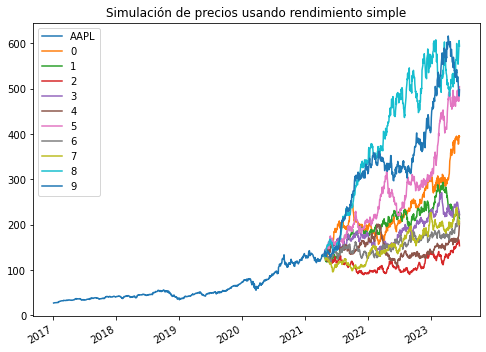

In [25]:
# Simulación del precio
S_0 = opcion_valuar.Underlying_Price
S_T = S_0*(1+Ri_dt).cumprod()
S_T.iloc[0,:] = S_0

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl, S_T.iloc[:, :10]]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');

### 2. Rendimiento Logarítmico

**Simulación de precios usando el rendimiento logarítmico**: Como demostramos en clases pasadas la fórmula de simular precios usando el rendimiento simple es la siguiente:
$$
S_T = S_0 \cdot e^{\sum_{i=1}^{T} r_i }
$$

In [26]:
Z.shape, len(dates)

((562, 10000), 562)

In [29]:
ri = calc_daily_ret(closes_aapl)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
# pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
# plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

83.33301072702355

In [30]:
print('Las std usando rendimientos logarítmicos y simples son similares')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son similares


(0.01993291839865288, 0.019951617173313948)

Con los precios simulados debemos de encontrar el valor de la opción según la función de pago correspondiente. Para este caso es:
$$
max(S_T - K,0)
$$

In [31]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL230616P00130000',
 'strike': 130.0,
 'currency': 'USD',
 'lastPrice': 22.8,
 'change': 0.29999924,
 'percentChange': 1.3333299,
 'volume': 4,
 'openInterest': 134,
 'bid': 22.65,
 'ask': 23.2,
 'contractSize': 'REGULAR',
 'expiration': 1686873600,
 'lastTradeDate': 1619116099,
 'impliedVolatility': 0.31836619140624994,
 'inTheMoney': False}

<AxesSubplot:>

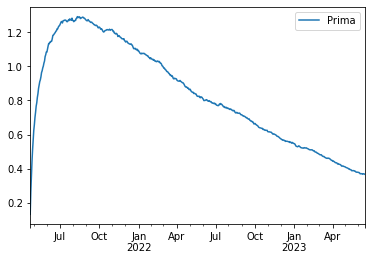

In [32]:
strike = pd.DataFrame(opcion_valuar['JSON']['strike']*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-mu_r*ndays) \
              *np.fmax(strike-S_T2,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
put.plot()

## 2. Valuación usando simulación: modelo normal para los rendimientos

- Hallar media y desviación estándar muestral de los rendimientos logarítmicos

In [33]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.0014506646469454579, 0.019951617173313948)

No se toma la media sino la tasa libre de riesgo
> Referencia: https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield

In [34]:
# Tasa de bonos de 1 yr de fecha 22/04/2021 -> 6%
r = 0.006/360 # Tasa diaria

- Simularemos el tiempo de contrato desde `HOY` hasta la fecha de `Expiry`, 10 escenarios:
    
    - Generar fechas

In [35]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = opcion_valuar.Expiry

dates = pd.date_range(start=today, end=expiry, freq='B')

ndays = len(dates)
nscen = 10
dates

DatetimeIndex(['2021-04-22', '2021-04-23', '2021-04-26', '2021-04-27',
               '2021-04-28', '2021-04-29', '2021-04-30', '2021-05-03',
               '2021-05-04', '2021-05-05',
               ...
               '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08',
               '2023-06-09', '2023-06-12', '2023-06-13', '2023-06-14',
               '2023-06-15', '2023-06-16'],
              dtype='datetime64[ns]', length=562, freq='B')

- Generamos 10 escenarios de rendimientos simulados y guardamos en un dataframe


In [36]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato

,0,1,2,...,7,8,9
2021-04-22,0.019,0.033,0.017,...,1.331e-02,-0.009,-0.007
2021-04-23,0.033,0.054,-0.009,...,1.890e-02,-0.043,0.010
2021-04-26,0.007,0.046,-0.010,...,-1.295e-02,-0.039,0.006
2021-04-27,0.033,0.048,-0.071,...,-5.934e-03,-0.052,-0.035
2021-04-28,0.039,0.050,-0.057,...,5.374e-04,-0.089,-0.031
...,...,...,...,...,...,...,...
2023-06-12,0.136,-1.216,-0.042,...,3.565e-01,-0.290,0.044
2023-06-13,0.129,-1.187,-0.007,...,3.501e-01,-0.317,0.026
2023-06-14,0.151,-1.155,0.017,...,3.360e-01,-0.317,0.025
2023-06-15,0.155,-1.146,0.016,...,3.262e-01,-0.309,0.038


- Con los rendimientos simulados, calcular los escenarios de precios respectivos:

In [37]:
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2021-04-22,134.431,136.402,134.189,...,133.707,130.719,131.040
2021-04-23,136.402,139.279,130.764,...,134.457,126.431,133.309
2021-04-26,132.820,138.127,130.682,...,130.242,126.879,132.750
2021-04-27,136.353,138.481,122.907,...,131.159,125.276,127.396
2021-04-28,137.171,138.737,124.645,...,132.011,120.696,127.929
...,...,...,...,...,...,...,...
2023-06-12,151.157,39.121,126.544,...,188.453,98.772,137.896
2023-06-13,150.074,40.245,130.981,...,187.251,96.075,135.415
2023-06-14,153.521,41.554,134.140,...,184.620,96.122,135.279
2023-06-15,154.023,41.936,134.069,...,182.821,96.907,136.984


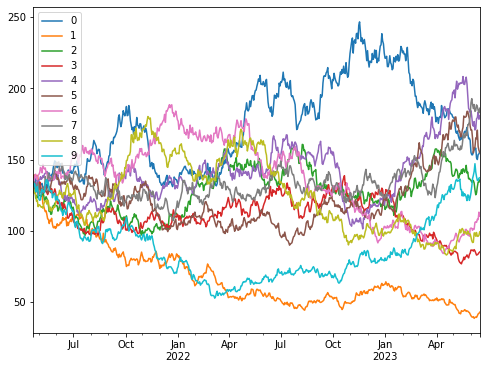

In [38]:
sim_closes.plot(figsize=(8,6));

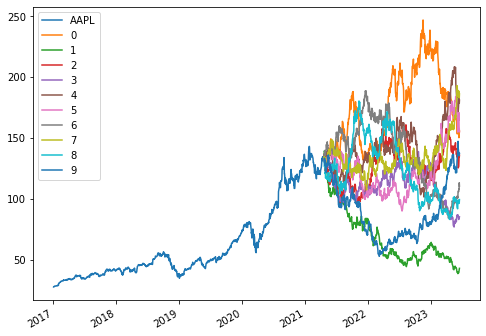

In [39]:
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,sim_closes]).plot(figsize=(8,6));

In [40]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL230616P00130000',
 'strike': 130.0,
 'currency': 'USD',
 'lastPrice': 22.8,
 'change': 0.29999924,
 'percentChange': 1.3333299,
 'volume': 4,
 'openInterest': 134,
 'bid': 22.65,
 'ask': 23.2,
 'contractSize': 'REGULAR',
 'expiration': 1686873600,
 'lastTradeDate': 1619116099,
 'impliedVolatility': 0.31836619140624994,
 'inTheMoney': False}

In [41]:
opcion_valuar

Strike                                                            130
Expiry                                            2023-06-16 00:00:00
Type                                                              put
Symbol                                            AAPL230616P00130000
Last                                                             22.8
                                          ...                        
Underlying                                                       AAPL
Underlying_Price                                                  132
Quote_Time                                        2021-04-22 23:59:58
Last_Trade_Date                                   2021-04-22 18:28:19
JSON                {'contractSymbol': 'AAPL230616P00130000', 'str...
Name: 1142, Length: 19, dtype: object

In [42]:
Hoy = date.today()

# strike price de la opción
K = opcion_valuar['JSON']['strike']  

# Fechas a simular
dates = pd.date_range(start= Hoy, periods = ndays, freq='B')

# Escenarios y número de días
ndays = len(dates)
nscen = 100000

# Condición inicial del precio a simular
S0 = closes_aapl.iloc[-1,0]  

# simular rendimientos
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)

# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())


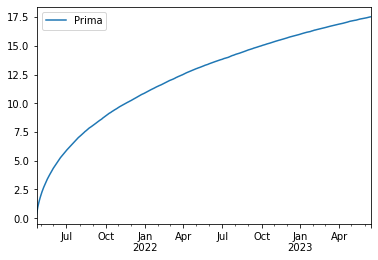

In [45]:
# Valor del put europeo
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(K-sim_closes, 0).mean(axis=1)}, index=dates)
put.plot();


In [46]:
put.iloc[-1]

Prima    17.535
Name: 2023-06-16 00:00:00, dtype: float64

Intervalo de confianza del 99%

In [47]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)


(16.927913826857278, 18.142065508109916)


## Precios simulados usando técnicas de reducción de varianza

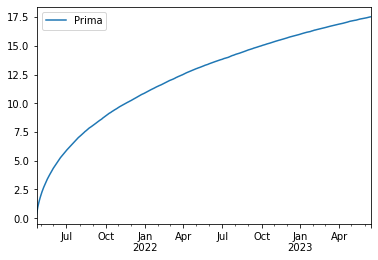

In [48]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

La valuación de la opción es:

In [49]:
put.iloc[-1]

Prima    17.535
Name: 2023-06-16 00:00:00, dtype: float64

Intervalo de confianza del 99%

In [50]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(16.927913826857278, 18.142065508109916)


### Análisis de la distribución de los rendimientos

### Ajustando norm

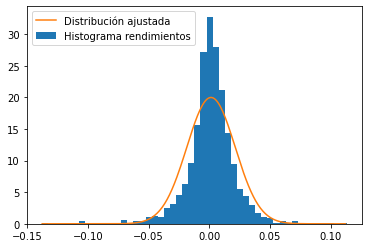

In [51]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,_ = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()


### Ajustando t

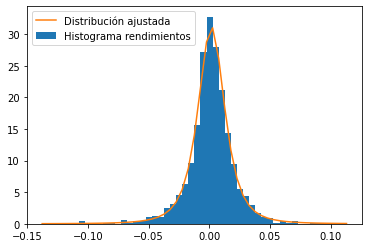

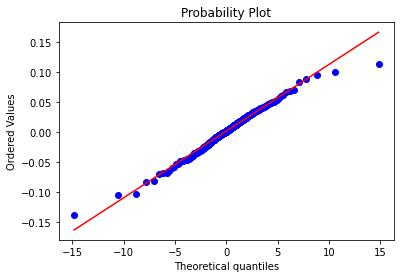

In [52]:
# rendimientos 
ren = calc_daily_ret(closes_aapl) 

# Histograma de los rendimientos
y, x, _ = plt.hist(ren['AAPL'], bins=50, density=True, label='Histograma rendimientos')

# Se ajustan los parámetros de una distribución
dist = 't'
params = getattr(st, dist).fit(ren.values) 

# Generación de la pdf de la distribución ajustado con los parámetros encontrados
curve_fit = getattr(st, dist).pdf(x, *params)
plt.plot(x, curve_fit, label='Distribución ajustada')
plt.legend()
plt.show()

# Q-Q
st.probplot(ren['AAPL'], sparams=params[:-2], dist=dist, plot=plt);


## 3. Valuación usando simulación: uso del histograma de rendimientos

Todo el análisis anterior se mantiene. Solo cambia la forma de generar los números aleatorios para la simulación montecarlo.

Ahora, generemos un histograma de los rendimientos diarios para generar valores aleatorios de los rendimientos simulados.

- Primero, cantidad de días y número de escenarios de simulación

In [53]:
ndays = len(dates) 
nscen = 10

- Del histograma anterior, ya conocemos las probabilidades de ocurrencia, lo que se llamó como variable `y`

In [54]:
prob = y/np.sum(y)
values = x[1:]

- Con esto, generamos los números aleatorios correspondientes a los rendimientos (tantos como días por número de escenarios).

In [55]:
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range(start=Hoy,periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,...,7,8,9
2021-04-22,-0.002,0.003,-0.007,...,0.008,0.003,-0.007
2021-04-23,0.023,0.023,0.013,...,0.003,0.003,0.018
2021-04-24,0.008,-0.002,0.013,...,-0.002,-0.002,0.008
2021-04-25,-0.012,0.013,0.008,...,0.023,-0.027,0.008
2021-04-26,-0.002,-0.007,0.008,...,0.003,0.013,0.023
...,...,...,...,...,...,...,...
2022-10-31,-0.002,-0.007,0.043,...,0.013,-0.012,0.003
2022-11-01,0.018,0.003,-0.007,...,0.003,-0.017,0.008
2022-11-02,0.003,0.003,-0.002,...,0.008,0.013,0.033
2022-11-03,-0.012,-0.007,-0.002,...,0.008,-0.027,-0.012


In [56]:
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,7,8,9
2021-04-22,131.645,132.307,130.986,...,132.972,132.307,130.986
2021-04-23,134.687,135.364,132.675,...,133.342,132.675,133.342
2021-04-24,135.741,135.061,134.385,...,133.044,132.378,134.385
2021-04-25,134.085,136.803,135.437,...,136.118,128.809,135.437
2021-04-26,133.784,135.813,136.497,...,136.497,130.470,138.567
...,...,...,...,...,...,...,...
2022-10-31,579.084,378.031,1325.180,...,1443.170,1174.841,806.408
2022-11-01,589.500,379.082,1315.596,...,1447.183,1154.699,812.717
2022-11-02,591.139,380.136,1312.652,...,1458.506,1169.588,839.884
2022-11-03,583.927,377.387,1309.714,...,1469.918,1138.059,829.637


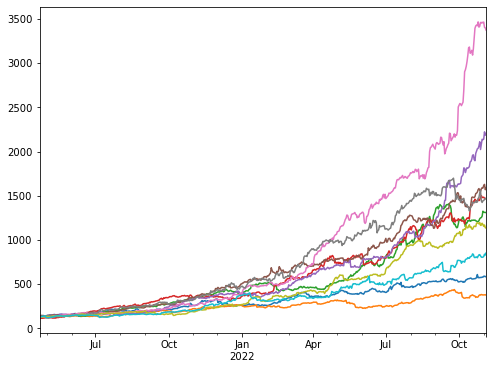

In [57]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

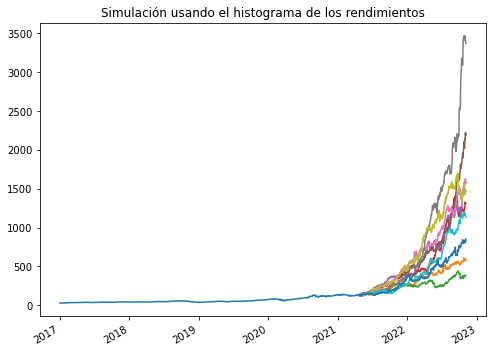

In [58]:
pd.concat([closes_aapl,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [59]:
K = opcion_valuar['JSON']['strike']
ndays = len(dates)
nscen = 100000

# Histograma tomando la tasa libre de riesgo
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)

# Simulación de los rendimientos
ret = np.random.choice(values[1:], ndays*nscen, p=prob)

# Simulación de precios
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_aapl.iloc[-1,0]) * np.exp(sim_ret_hist.cumsum())

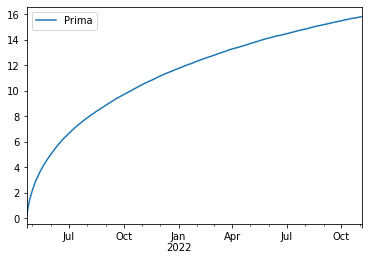

In [60]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                          *np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [61]:
put_hist.iloc[-1]

Prima    15.812
Name: 2022-11-04 00:00:00, dtype: float64

In [62]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL230616P00130000',
 'strike': 130.0,
 'currency': 'USD',
 'lastPrice': 22.8,
 'change': 0.29999924,
 'percentChange': 1.3333299,
 'volume': 4,
 'openInterest': 134,
 'bid': 22.65,
 'ask': 23.2,
 'contractSize': 'REGULAR',
 'expiration': 1686873600,
 'lastTradeDate': 1619116099,
 'impliedVolatility': 0.31836619140624994,
 'inTheMoney': False}

Intervalo de confianza del 95%

In [63]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)


(15.334383859014611, 16.289627368950132)
(15.334383859014611, 16.289627368950132)


## RESPUESTA ARANZAZU

Descarar las opciones de Apple

In [10]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from datetime import date
%matplotlib inline

aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,,,,,,,,,,,,
2021-04-30,75.0,put,AAPL210430P00075000,0.01,0.0,0.0,0.0,0.0,2.0,0.0,0.500005,AAPL,False,AAPL,134.72,2021-04-26 20:00:01,2021-04-23 19:33:13,"{'contractSymbol': 'AAPL210430P00075000', 'str..."
2021-04-30,132.0,put,AAPL210430P00132000,1.63,0.0,0.0,0.0,0.0,6811.0,0.0,0.062509,AAPL,False,AAPL,134.72,2021-04-26 20:00:01,2021-04-26 19:59:47,"{'contractSymbol': 'AAPL210430P00132000', 'str..."
2021-04-30,80.0,put,AAPL210430P00080000,0.01,0.0,0.0,0.0,0.0,2.0,0.0,0.500005,AAPL,False,AAPL,134.72,2021-04-26 20:00:01,2021-04-26 16:38:05,"{'contractSymbol': 'AAPL210430P00080000', 'str..."
2021-04-30,80.0,call,AAPL210430C00080000,54.87,0.0,0.0,0.0,0.0,36.0,0.0,0.000010,AAPL,False,AAPL,134.72,2021-04-26 20:00:01,2021-04-26 18:35:15,"{'contractSymbol': 'AAPL210430C00080000', 'str..."
2021-04-30,133.0,call,AAPL210430C00133000,3.66,0.0,0.0,0.0,0.0,8100.0,0.0,0.000010,AAPL,False,AAPL,134.72,2021-04-26 20:00:01,2021-04-26 19:59:40,"{'contractSymbol': 'AAPL210430C00133000', 'str..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-16,120.0,call,AAPL230616C00120000,31.45,0.0,0.0,0.0,0.0,70.0,0.0,0.000010,AAPL,False,AAPL,134.72,2021-04-26 20:00:01,2021-04-26 19:59:50,"{'contractSymbol': 'AAPL230616C00120000', 'str..."
2023-06-16,120.0,put,AAPL230616P00120000,16.45,0.0,0.0,0.0,0.0,3.0,0.0,0.015635,AAPL,False,AAPL,134.72,2021-04-26 20:00:01,2021-04-26 16:20:34,"{'contractSymbol': 'AAPL230616P00120000', 'str..."
2023-06-16,125.0,call,AAPL230616C00125000,29.00,0.0,0.0,0.0,0.0,49.0,0.0,0.000010,AAPL,False,AAPL,134.72,2021-04-26 20:00:01,2021-04-26 19:29:32,"{'contractSymbol': 'AAPL230616C00125000', 'str..."


Analizar los datos de las opciones PUT

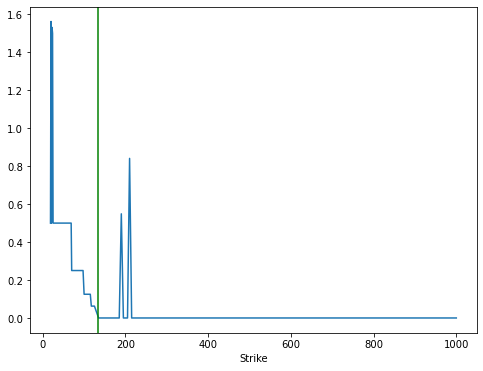

In [11]:
fecha1 = '2021-06-18'
fecha2 = '2022-09-16'
put06_f1 = aapl_opt.loc[(aapl_opt.Expiry==fecha1) & (aapl_opt.Type=='put')]
ax = put06_f1.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06_f1.Underlying_Price.iloc[0], color='g')

Defino el strike price depende a mi intuición de lo que pasara despues del último precio de la acción.
> Si intuyo que va a la alza, hare un call.  
> Si intuyo que va a la baja, hare un put.

In [12]:
# Último precio de la acción
aapl_opt.Underlying_Price[0]

134.72

Como en este caso haré un put, mi strike price será menor al último precio, en este caso $130.

In [13]:
K = 130 # strike price
indice_opt = aapl_opt.loc[(aapl_opt.Type=='put') & (aapl_opt.Strike==K) & (aapl_opt.Expiry=='2023-06-16')]
indice_opt

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
1149,130.0,2023-06-16,put,AAPL230616P00130000,21.5,0.0,0.0,0.0,0.0,3.0,0.0,0.007822,AAPL,False,AAPL,134.72,2021-04-26 20:00:01,2021-04-26 19:51:35,"{'contractSymbol': 'AAPL230616P00130000', 'str..."


In [14]:
i_opt= indice_opt.index
opcion_valuar = aapl_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'AAPL230616P00130000',
 'strike': 130.0,
 'currency': 'USD',
 'lastPrice': 21.5,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 3,
 'openInterest': 0,
 'bid': 0.0,
 'ask': 0.0,
 'contractSize': 'REGULAR',
 'expiration': 1686873600,
 'lastTradeDate': 1619466695,
 'impliedVolatility': 0.007822421875,
 'inTheMoney': False}

In [15]:
print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  134.72


## RENDIMIENTO
### Calcular el rendimiento simple

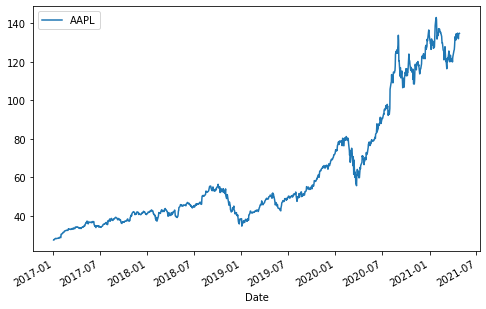

In [16]:
# 1. DESCARGAR LOS PRECIOS DE CIERRE DEL ACTIVO

# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

In [17]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,AAPL
Date,
2017-01-04,-0.001119
2017-01-05,0.005085
2017-01-06,0.011148
2017-01-09,0.009160
2017-01-10,0.001009
...,...
2021-04-20,-0.012830
2021-04-21,0.002930
2021-04-22,-0.011685


In [18]:
# Encontrar la fecha de hoy en fomato timestamp
today = pd.to_datetime(date.today())

# Obtener fecha de cierre de la opción a valuar
expiry = opcion_valuar.Expiry

# Cantidad de escenarios
nscen = 10000

# Generar rangos de fechas de días hábiles
dates = pd.date_range(today, expiry, freq='B')
ndays = len(dates)

In [19]:
# Rendimiento diario 
dt = 1
# Z ~ N(0,1) normal estándar (ndays, nscen)
Z = np.random.randn(ndays, nscen)

# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(Z * sigma_R * np.sqrt(dt) + mu_R * dt, index = dates)
Ri_dt.shape
#559 días a simular, 10000 escenarios

(559, 10000)

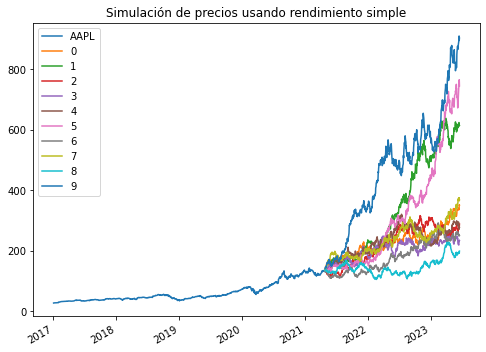

In [20]:
# Spot Price
S0 = opcion_valuar.Underlying_Price
S_T = S0*(1+Ri_dt).cumprod()
pd.concat([closes_aapl, S_T.iloc[:, :10]]).plot(figsize=(8,6))
plt.title('Simulación de precios usando rendimiento simple');

### Calcular el rendimiento logaritmico

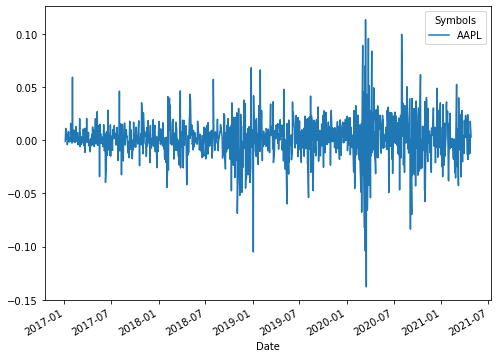

In [21]:
def calc_daily_ret(closes):
    '''Función a la que se le ingresan los precios al cierre de un activo y devuelve los
    rendimientos logaritmicos de esta'''
    return np.log(closes/closes.shift(1)).iloc[1:]

ri = calc_daily_ret(closes_aapl)
ri.plot(figsize=(8,6));

In [22]:
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

Z = np.random.randn(ndays, nscen)

# Simular los rendimientos
ri_dt = pd.DataFrame(Z * sigma_r * np.sqrt(dt) + mu_r * dt, index = dates)
ri_dt.shape

S_T2 = S0 * np.exp(ri_dt.cumsum())

#por que quiero que todos los escenarios empiecen desde el mismo valor
S_T2.iloc[0,:] = S0
S_T2

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2021-04-27,134.720000,134.720000,134.720000,134.720000,134.720000,134.720000,134.720000,134.720000,134.720000,134.720000,...,134.720000,134.720000,134.720000,134.720000,134.720000,134.720000,134.720000,134.720000,134.720000,134.720000
2021-04-28,133.884951,135.296625,135.803214,131.079693,131.291029,138.453250,128.871573,140.581966,140.701355,134.205323,...,139.991491,133.221765,132.052996,133.955212,126.056360,132.459712,135.668763,135.253890,141.979927,140.131468
2021-04-29,136.841828,140.015776,138.079772,135.671607,133.670568,143.176658,127.458629,141.260257,142.392020,134.118591,...,138.837852,132.340072,131.678999,131.387939,129.771555,132.602895,134.466196,132.016824,139.405969,143.272820
2021-04-30,135.575418,140.878552,138.066764,138.553492,136.010281,145.001744,128.017689,142.866400,143.671447,134.777291,...,137.304800,132.506906,132.768145,127.140835,133.821877,131.530412,134.138409,135.911096,143.046395,146.898132
2021-05-03,136.053789,135.352383,132.595083,141.088365,135.212312,148.096981,126.138748,143.834691,146.039179,136.522653,...,131.758788,130.312112,132.087031,123.877853,133.085986,131.316139,135.952061,134.493990,148.204627,148.283421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-12,498.459395,464.129328,346.795300,396.280023,407.036116,276.362306,144.107787,369.843390,435.440877,163.460905,...,264.571246,213.119624,213.264689,282.990436,237.468076,355.284730,220.448389,170.909422,441.775370,248.399278
2023-06-13,497.462276,464.713290,345.175838,391.139784,406.898433,278.893455,142.333093,376.234810,448.333871,168.342211,...,263.047895,212.536543,216.479562,289.885101,236.809414,369.309651,217.571942,165.869497,439.264426,238.593112
2023-06-14,487.018948,472.645726,335.821617,391.488657,422.980781,280.399685,146.447422,367.052985,448.131533,168.061335,...,268.271345,216.848374,212.573950,292.109768,238.219162,373.260457,210.807030,163.600034,425.896537,236.685001
2023-06-15,483.056737,473.582223,338.203762,373.358762,427.165952,274.837004,147.365921,360.143168,438.961374,165.823547,...,269.881488,222.415436,210.430719,294.071066,238.019438,373.559766,206.412632,166.460750,422.399950,233.683347


In [23]:
# Simulación del rendimiento
sim_ret_ri = pd.DataFrame(mu_r * dt + Z * sigma_r * np.sqrt(dt), index=dates )

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
# pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
# plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

84.80016413926597

In [24]:
print('Las std usando rendimientos logarítmicos y simples son similares')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son similares


(0.019920764041241535, 0.019939482050026457)

Con los precios simulados debemos de encontrar el valor de la opción según la función de pago correspondiente. Para este caso es Put:
$$
max(K-S(T),0)
$$

In [25]:
# Hallar media y desviación estándar muestral de los rendimientos logarítmicos
mu = ri.mean()[0]
sigma = ri.std()[0]
mu, sigma

(0.0014672236303057238, 0.019939482050026457)

In [26]:
# Tasa de bonos de 1 yr de fecha 26/04/21 -> 6%
# tasa libre de riesgo (bonos del tesoro) 
r = 0.006/360 # Tasa diaria

- Simularemos el tiempo de contrato desde `HOY` hasta la fecha de `Expiry`, 10 escenarios:

In [27]:
# Generar fechas
today = pd.Timestamp(date.today())
expiry = opcion_valuar.Expiry

dates = pd.date_range(start=today, end=expiry, freq='B')

ndays = len(dates)
nscen = 10
dates

DatetimeIndex(['2021-04-27', '2021-04-28', '2021-04-29', '2021-04-30',
               '2021-05-03', '2021-05-04', '2021-05-05', '2021-05-06',
               '2021-05-07', '2021-05-10',
               ...
               '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08',
               '2023-06-09', '2023-06-12', '2023-06-13', '2023-06-14',
               '2023-06-15', '2023-06-16'],
              dtype='datetime64[ns]', length=559, freq='B')

In [28]:
# Generamos 10 escenarios de rendimientos simulados y guardamos en un dataframe
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)

# Con los rendimientos simulados, calcular los escenarios de precios respectivos:
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes.iloc[0,:] = S0
sim_closes

,0,1,2,3,4,5,6,7,8,9
2021-04-27,134.720001,134.720001,134.720001,134.720001,134.720001,134.720001,134.720001,134.720001,134.720001,134.720001
2021-04-28,135.243018,138.921670,135.397705,137.962324,135.101939,137.322904,133.840088,130.199914,130.763689,134.343190
2021-04-29,134.804355,136.244929,135.508369,133.013750,136.244569,143.164584,134.222362,131.730688,130.321885,135.304363
2021-04-30,137.066892,132.803675,130.982376,134.229669,134.348735,143.212112,137.441456,131.516652,128.998790,128.895509
2021-05-03,134.569720,132.975796,129.823310,131.182213,133.235379,142.429232,137.796757,132.331813,128.039274,126.729415
...,...,...,...,...,...,...,...,...,...,...
2023-06-12,69.794883,146.144351,191.718698,101.305133,104.696326,182.962242,101.888484,138.748621,193.853957,141.263186
2023-06-13,67.835945,146.296392,189.660075,101.523099,104.007191,186.850781,100.244321,142.232395,190.425746,144.324819
2023-06-14,68.872774,144.448491,191.791564,104.621798,103.578793,184.271500,100.275193,145.188118,185.315655,145.038225
2023-06-15,68.682489,149.841378,185.359204,105.526334,102.034246,192.037314,99.495127,145.021483,181.954229,144.529937


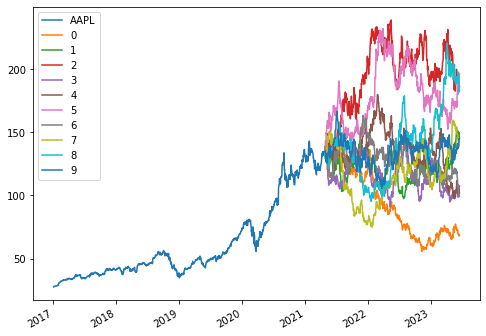

In [29]:
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,sim_closes]).plot(figsize=(8,6));

In [30]:
# Mi objetivo es llegar a 21.5 (lastPrice)
opcion_valuar['JSON']

{'contractSymbol': 'AAPL230616P00130000',
 'strike': 130.0,
 'currency': 'USD',
 'lastPrice': 21.5,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 3,
 'openInterest': 0,
 'bid': 0.0,
 'ask': 0.0,
 'contractSize': 'REGULAR',
 'expiration': 1686873600,
 'lastTradeDate': 1619466695,
 'impliedVolatility': 0.007822421875,
 'inTheMoney': False}

In [31]:
Hoy = date.today()

# strike price
K = opcion_valuar['JSON']['strike']  

# Fechas a simular
dates = pd.date_range(start= Hoy, periods = ndays, freq='B')

# Escenarios y número de días
ndays = len(dates)
nscen = 100000

# Condición inicial del precio a simular
S0 = closes_aapl.iloc[-1,0]  

# simular rendimientos
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)

# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())

Prima de la opcioón PUT

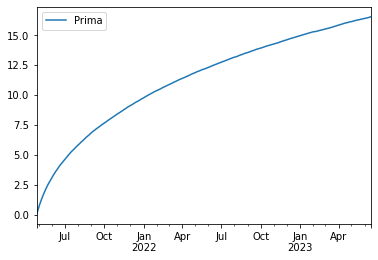

In [32]:
# Frame con el valor del strike
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)

# Valor del put europeo
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike - sim_closes,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
put.plot();

La valuación de la opción es:

In [33]:
put.iloc[-1]

Prima    16.541738
Name: 2023-06-16 00:00:00, dtype: float64

Intevalo de confianza:

In [34]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
# No es tan cercano al valor de 21.5 

(15.923469905647234, 17.160006808323924)


Simular precios con reducción de varianza (estratificado)

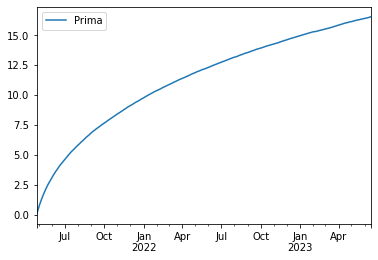

In [35]:
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put2 = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put2.plot();

Intevalo de confianza:

In [36]:
put2.iloc[-1]

Prima    16.541738
Name: 2023-06-16 00:00:00, dtype: float64

Intevalo de confianza:

In [37]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put2.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(15.923469905647362, 17.160006808324052)


### Análisis de la distribución de los rendimientos
### Ajustando norm

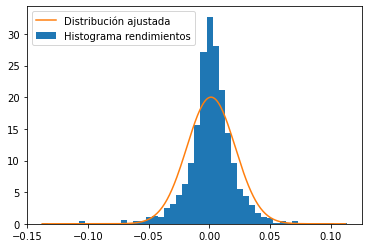

In [38]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

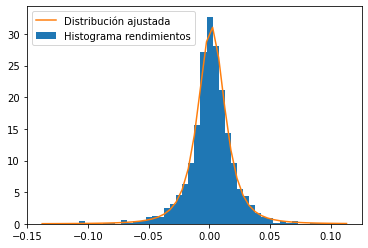

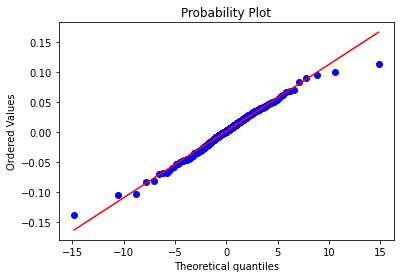

In [41]:
# Histograma de los rendimientos
y, x, _ = plt.hist(ren['AAPL'], bins=50, density=True, label='Histograma rendimientos')

# Se ajustan los parámetros de una distribución
dist = 't'
params = getattr(st, dist).fit(ren.values) 

# Generación de la pdf de la distribución ajustado con los parámetros encontrados
curve_fit = getattr(st, dist).pdf(x, *params)
plt.plot(x, curve_fit, label='Distribución ajustada')
plt.legend()
plt.show()

# Q-Q
st.probplot(ren['AAPL'], sparams=params[:-2], dist=dist, plot=plt);



###  Valuación usando simulación: uso del histograma de rendimientos

In [44]:
# Primero, cantidad de días y número de escenarios de simulación
ndays = len(dates) 
nscen = 10

# Probabilidades de ocurrencia (y)
prob = y/np.sum(y)
values = x[1:]

Generamos los números aleatorios correspondientes a los rendimientos

In [46]:
# Rendimiento Simulados
ret = np.random.choice(values, ndays*nscen, p=prob)

# Fechas
dates = pd.date_range(start=Hoy,periods=ndays)

# Rendimientos
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)

# Precios Simulados
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,3,4,5,6,7,8,9
2021-04-27,129.779474,137.143400,137.143400,135.094584,139.223288,133.745740,135.774099,135.094584,135.094584,135.774099
2021-04-28,134.117614,138.216460,138.911678,134.792215,141.018383,134.792215,136.151613,136.836445,135.470209,152.040958
2021-04-29,131.818303,138.600765,121.649929,134.490522,145.002853,134.490522,135.166999,136.530177,133.147709,151.700659
2021-04-30,133.517920,137.598439,121.377651,136.224594,149.099904,136.224594,134.864467,136.224594,128.910004,147.611224
2021-05-01,133.889161,135.239452,113.458938,136.603361,154.858897,137.981025,128.621477,137.290465,133.889161,148.766188
...,...,...,...,...,...,...,...,...,...,...
2022-11-02,1250.854873,1591.470151,2499.814002,2487.303066,898.242320,1171.871630,850.011126,1362.227908,1607.520351,1008.115536
2022-11-03,1260.642015,1579.961036,2506.764627,2469.315511,896.231869,1146.016701,860.970862,1379.791983,1611.989992,1010.918558
2022-11-04,1251.525367,1560.685031,2501.153973,2451.458037,916.942724,1126.369400,872.071909,1425.914302,1640.987133,1049.965352
2022-11-05,1255.005179,1572.896396,2483.066251,2421.549503,883.316089,1085.062554,861.432367,1429.878995,1662.145428,1068.852563


Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

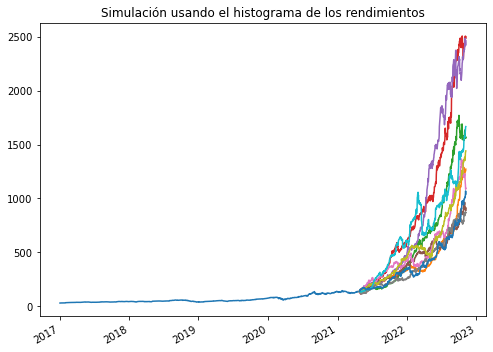

In [47]:
pd.concat([closes_aapl,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [49]:
K = opcion_valuar['JSON']['strike']
ndays = len(dates)
nscen = 100000

# Histograma tomando la tasa libre de riesgo
freq, values = np.histogram(ri+r-mu, bins=2000)
prob = freq/np.sum(freq)

# Simulación de los rendimientos
ret = np.random.choice(values[1:], ndays*nscen, p=prob)

# Simulación de precios
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_aapl.iloc[-1,0]) * np.exp(sim_ret_hist.cumsum())

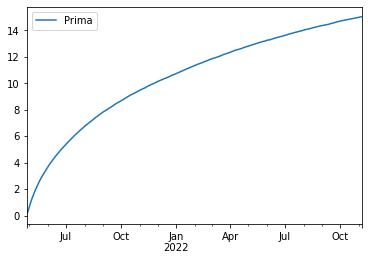

In [50]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                          *np.fmax(strike - sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

La valuación de la opción es:

In [51]:
# Precio de la prima
put_hist.iloc[-1]

Prima    15.01608
Name: 2022-11-06 00:00:00, dtype: float64

Intervalo de confianza del 99%

In [53]:
confianza = 0.99
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i4 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i3 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)

In [56]:
print('Intervalo de confianza: ', i1)
print('Intervalo de confianza con el método de reducción de varianza: ', i2)
print('Intervalo de confianza con norm ajustado: ', i3)
print('Intervalo de confianza con t ajustado: ', i4)
print('El valor teórico de la ecuación de Black & Scholes es de 21.5')

Intervalo de confianza:  (15.923469905647234, 17.160006808323924)
Intervalo de confianza con el método de reducción de varianza:  (15.923469905647362, 17.160006808324052)
Intervalo de confianza con norm ajustado:  (14.376743815825426, 15.655416687486417)
Intervalo de confianza con t ajustado:  (14.376731612315151, 15.655428890996692)
El valor teórico de la ecuación de Black & Scholes es de 21.5
